In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import itertools

import os
os.sys.path.append('../')
import utilities as u
import preprocessing as pp


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
mouse = '4139265.4'
df = pp.load_session_db()

df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1371,4139265.4,07_02_2019,2,TwoTower_foraging,60,1,CA1,2019-02-07,G:\My Drive\VR_Data\TwoTower\4139265.4\07_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...
1373,4139265.4,07_02_2019,4,TwoTower_foraging,60,1,CA1,2019-02-07,G:\My Drive\VR_Data\TwoTower\4139265.4\07_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...
1407,4139265.4,10_02_2019,2,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.4\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\10_02_2...
1436,4139265.4,12_02_2019,2,TwoTower_foraging,85,1,CA1,2019-02-12,G:\My Drive\VR_Data\TwoTower\4139265.4\12_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...
1459,4139265.4,15_02_2019,3,TwoTower_foraging,82,1,CA1,2019-02-15,G:\My Drive\VR_Data\TwoTower\4139265.4\15_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\15_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\15_02_2...
1478,4139265.4,17_02_2019,2,TwoTower_foraging,94,1,CA1,2019-02-17,G:\My Drive\VR_Data\TwoTower\4139265.4\17_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\17_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\17_02_2...
1489,4139265.4,18_02_2019,2,TwoTower_foraging,101,1,CA1,2019-02-18,G:\My Drive\VR_Data\TwoTower\4139265.4\18_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...
1498,4139265.4,19_02_2019,2,TwoTower_foraging,97,1,CA1,2019-02-19,G:\My Drive\VR_Data\TwoTower\4139265.4\19_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\19_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\19_02_2...
1510,4139265.4,20_02_2019,2,TwoTower_foraging,99,1,CA1,2019-02-20,G:\My Drive\VR_Data\TwoTower\4139265.4\20_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\20_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\20_02_2...


In [105]:
sess = df_mouse.iloc[-3]
VRDat,Ca,S,A = pp.load_scan_sess(sess)

num aberrant ttls 0.0


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [134]:
print(sess)

MouseName                                                4139265.4
DateFolder                                              18_02_2019
SessionNumber                                                    2
Track                                            TwoTower_foraging
RewardCount                                                    101
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-02-18 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4139265.4\18_02_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...
Name: 1489, dtype: object


In [106]:
avec = np.linspace(0,1,num=20)
C = np.array([(x,y) for x,y in itertools.product(avec.tolist(),avec.tolist())])
dispersion = .01
beta = np.ones([C.shape[0],])
rbf = lambda x : np.exp(-np.diag(np.matmul(x-C,(x-C).T))/dispersion)
K = lambda X: np.array(list(map(rbf,X.tolist())))
#eta = lambda k,b: np.log(np.dot(k,b))
#mu = lambda X,b: np.exp(np.dot(K(X),b

In [107]:
A  = np.array([[0,1],[2,3],[4,5]])
beta = np.random.randn(400)
k = K(A)
print(k.shape,beta.shape,eta(k,beta).shape)

(3, 400) (400,) (3,)


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [130]:
def objective(b,S,k,alpha):
    u = np.dot(k,b)
#     print(u.shape)
#     return -(S*u - np.exp(u)).sum() + alpha*np.linalg.norm(b,ord=2)
    return np.linalg.norm(S-np.exp(u),ord=2)**2 + alpha*np.linalg.norm(b,ord=2)

def gradient(b,S,k,alpha):
    # return gradient vector
    u = np.dot(k,b)
    return -((S-np.exp(u))[:,np.newaxis]*k).sum(axis=0) +2*alpha*b
    

def hessian(b,S,k,alpha):
    H = np.zeros([b.shape[0],b.shape[0]])
    a = np.exp(np.dot(k,b))
    U = a[:,np.newaxis]*k
    print(a.shape,U.shape,k.shape)
    for i in range(S.shape[0]):
        H+=np.matmul(U[i,:].T,k[i,:])
        
    H+= 2*alpha*np.eye(H.shape[0])
        
    return H

In [122]:
print(k.shape)
J = objective(beta,Y,k,.1)


(23324, 400)
(23324,)


In [109]:
print(VRDat.columns)

Index(['time', 'morph', 'trialnum', 'pos', 'dz', 'lick', 'reward', 'tstart',
       'teleport', 'rzone', 'toutzone', 'clickOn', 'blockWalls', 'towerJitter',
       'wallJitter', 'bckgndJitter', 'scanning', 'manrewards', 'cmd', 'speed',
       'lick rate', 'trial number'],
      dtype='object')


In [111]:
import pickle
fname = os.path.join("G:\\My Drive\\Figures\\TwoTower\\PlaceCells\\S",
                     mouse,"%s_%s_%d_results.pkl" % (mouse,sess['DateFolder'],sess['SessionNumber']))
with open(fname,"rb") as f:
    res= pickle.load(f)
    
SI = res['SI'][0]['all']+res['SI'][1]['all']
order = np.argsort(SI)[::-1]


In [112]:
X = np.zeros([VRDat.shape[0],2])
X[:,0],X[:,1]=VRDat.pos._values,VRDat.morph._values+VRDat.bckgndJitter._values+VRDat.wallJitter._values
mask = X[:,0]>0
Y = S[:,order[0]]
X,Y=X[mask,:],Y[mask]

In [121]:
k = K(X)

In [47]:
print(k.shape)

(25954, 400)


In [49]:
G=gradient(Y,k,beta)

In [50]:
print(G.shape)

(400,)


In [53]:
H = hessian(Y,k,beta)

(25954,) (25954, 400) (25954, 400)


In [17]:
print(H.shape)

-3.643243805268814e+69


In [133]:
# results = sp.optimize.minimize(objective,beta,args=(Y,k,0.01),jac=gradient,hess=hessian)
results = sp.optimize.minimize(objective,beta,args=(Y,k,0.01))

In [126]:
results.keys()
results.x.shape

(400,)

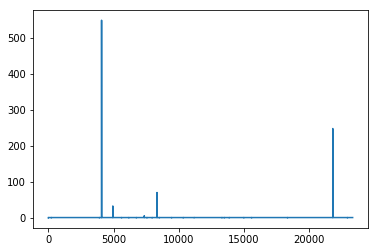

In [132]:
f,ax = plt.subplots()
#ax.plot(Y)
ax.plot(np.exp(np.dot(k,results.x)))

In [80]:
print(results.x)

[-4.78801627e-02  4.90597168e-01 -2.76342208e-01  3.10528198e-01
 -3.37906629e-02  5.01043593e-01 -6.85813375e-01 -8.92521726e-01
 -6.88784773e-01 -9.70588239e-01 -4.42955683e-01  2.02890746e-01
  7.40240913e-01 -1.18128124e-01  3.22183239e-01 -2.64543496e-01
 -5.59109054e-01 -7.66270422e-03 -1.44863595e+00 -2.84996724e+00
 -6.22453832e-02 -5.56205731e-01 -2.61449919e-01  6.39539132e-01
 -4.16959699e-02 -1.39882981e-01 -1.06469059e-01 -8.72193648e-01
 -1.32343637e+00 -9.70148318e-01  2.90070142e-02  6.08123336e-01
  7.81718211e-01  1.26892963e+00  7.53685287e-01  3.16085101e-01
  5.49904617e-02 -3.71633290e-01 -5.25803350e-01 -2.46913085e+00
  7.00370070e-02 -4.82137114e-02 -5.35309536e-01  8.81883218e-02
 -1.11007708e-01  1.17103344e-01 -8.13796413e-01 -5.38865835e-01
 -1.26239944e+00 -4.53636001e-01  1.18828792e-01  1.09002469e+00
  2.12060895e+00  1.92304129e+00  1.31433313e+00  5.21899397e-01
  1.09223072e-01 -4.62546798e-01 -9.63872227e-01 -2.90108663e+00
 -2.63094035e-01 -3.96125